In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
output_sub = 'sub_avg_v04.csv'
# output_oof = 'oof_lgb_v01_y.csv'

ID = 'tweet_id'
TARGET = 'engagement_count'
DATA_DIR = "../input"

TRAIN_FILE = "{0}/expert_training.csv".format(DATA_DIR)
SUBMISSION_FILE = "{0}/expert_samplesubmission.csv".format(DATA_DIR)

In [14]:
train = pd.read_csv(TRAIN_FILE)
sub = pd.read_csv(SUBMISSION_FILE)

oof_pred1 = pd.read_csv('../20_xgb/oof_xgb_v17_reglinear.csv')
oof_pred2 = pd.read_csv('../20_xgb/oof_xgb_v17_count.csv')
oof_pred3 = pd.read_csv('../20_xgb/oof_xgb_v17_regtweedie.csv')
oof_pred4 = pd.read_csv('../20_xgb/oof_xgb_v17_reglinear_logy1.csv')
oof_pred5 = pd.read_csv('../20_xgb/oof_xgb_v17_reglinear_rooty.csv')
oof_pred6 = pd.read_csv('../20_xgb/oof_xgb_v17_reglinear_rootrooty.csv')

oof_pred7 = pd.read_csv('../20_xgb/oof_xgb_v18_reglinear.csv')
oof_pred8 = pd.read_csv('../20_xgb/oof_xgb_v18_count.csv')
oof_pred9 = pd.read_csv('../20_xgb/oof_xgb_v18_reglinear_rooty.csv')


test_pred1 = pd.read_csv('../20_xgb/sub_xgb_v17_reglinear.csv')
test_pred2 = pd.read_csv('../20_xgb/sub_xgb_v17_count.csv')
test_pred3 = pd.read_csv('../20_xgb/sub_xgb_v17_regtweedie.csv')
test_pred4 = pd.read_csv('../20_xgb/sub_xgb_v17_reglinear_logy1.csv')
test_pred5 = pd.read_csv('../20_xgb/sub_xgb_v17_reglinear_rooty.csv')
test_pred6 = pd.read_csv('../20_xgb/sub_xgb_v17_reglinear_rootrooty.csv')

test_pred7 = pd.read_csv('../20_xgb/sub_xgb_v18_reglinear.csv')
test_pred8 = pd.read_csv('../20_xgb/sub_xgb_v18_count.csv')
test_pred9 = pd.read_csv('../20_xgb/sub_xgb_v18_reglinear_rooty.csv')

In [15]:
oof_pred = pd.DataFrame()
oof_pred['pred1'] = oof_pred1[TARGET]
oof_pred['pred2'] = oof_pred2[TARGET]
oof_pred['pred3'] = oof_pred3[TARGET]
oof_pred['pred4'] = oof_pred4[TARGET]
oof_pred['pred5'] = oof_pred5[TARGET]
oof_pred['pred6'] = oof_pred6[TARGET]
oof_pred['pred7'] = oof_pred7[TARGET]
oof_pred['pred8'] = oof_pred8[TARGET]
oof_pred['pred9'] = oof_pred9[TARGET]
oof_pred[TARGET] = oof_pred5['actual']

test_pred = pd.DataFrame()
test_pred[ID] = sub[ID]
test_pred['pred1'] = test_pred1[TARGET]
test_pred['pred2'] = test_pred2[TARGET]
test_pred['pred3'] = test_pred3[TARGET]
test_pred['pred4'] = test_pred4[TARGET]
test_pred['pred5'] = test_pred5[TARGET]
test_pred['pred6'] = test_pred6[TARGET]
test_pred['pred7'] = test_pred7[TARGET]
test_pred['pred8'] = test_pred8[TARGET]
test_pred['pred9'] = test_pred9[TARGET]

In [16]:
test_pred

,tweet_id,pred1,pred2,pred3,pred4,pred5,pred6,pred7,pred8,pred9
0,100003,59.096291,62.133417,50.372701,47.275084,54.428426,49.187629,58.341102,63.951187,50.996097
1,100005,46.814056,46.998943,37.858763,28.955149,37.960521,31.744302,50.517853,53.347392,40.400897
2,100008,57.976169,59.673745,45.624072,39.607907,45.147121,43.840164,57.160233,64.246123,41.966508
3,100019,158.885106,87.086784,78.554464,69.429345,86.608568,78.703823,147.712117,93.536362,84.049918
4,100022,49.021703,60.205932,41.364385,32.950630,40.913713,35.927595,59.769629,60.404390,45.083128
...,...,...,...,...,...,...,...,...,...,...
8916,135650,138.177263,113.163948,120.669566,108.889745,142.897749,129.144252,123.945625,111.868427,131.653427
8917,135668,61.962058,48.612595,45.235231,28.907962,53.135061,35.743951,49.803608,48.339686,48.804915
8918,135670,27.561599,17.934295,12.546478,10.198186,12.912346,10.768698,16.706980,19.043550,12.843555
8919,135672,109.353401,95.814142,80.755827,68.980398,77.214422,79.744745,95.451197,93.575967,61.570860


<AxesSubplot:>

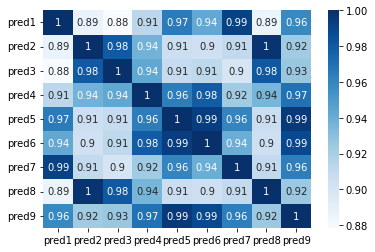

In [12]:
sns.heatmap(test_pred.drop(['tweet_id'],axis=1).corr(), cmap="Blues", annot=True)

Text(0.5, 1.0, 'reg:linear vs count:poisson')

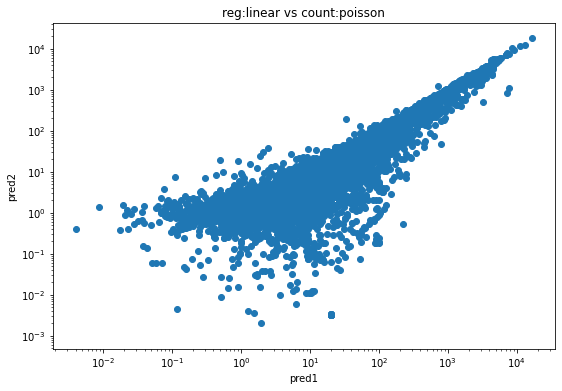

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (9, 6))
ax.set_xscale("log")
ax.set_yscale("log")

plt.scatter(test_pred['pred1'], test_pred['pred5'])
plt.xlabel('pred1')
plt.ylabel('pred2')
plt.title('reg:linear vs count:poisson')

Text(0.5, 1.0, 'reg:linear y vs reg:linear logy1')

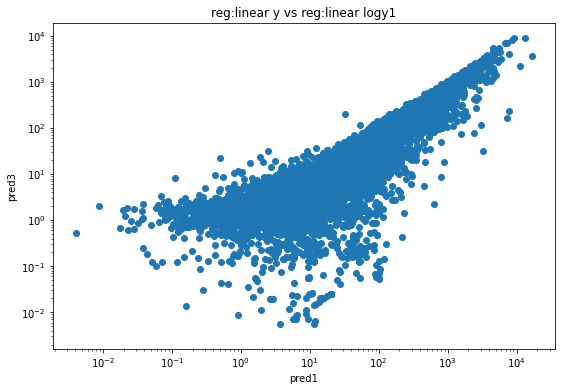

In [9]:
fig, ax = plt.subplots(figsize = (9, 6))
ax.set_xscale("log")
ax.set_yscale("log")

plt.scatter(test_pred['pred1'], test_pred['pred3'])
plt.xlabel('pred1')
plt.ylabel('pred3')
plt.title('reg:linear y vs reg:linear logy1')

Text(0.5, 1.0, 'reg:linear y vs reg:linear logy1')

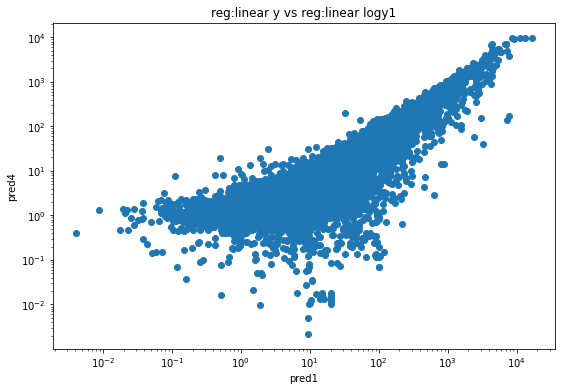

In [10]:
fig, ax = plt.subplots(figsize = (9, 6))
ax.set_xscale("log")
ax.set_yscale("log")

plt.scatter(test_pred['pred1'], test_pred['pred4'])
plt.xlabel('pred1')
plt.ylabel('pred4')
plt.title('reg:linear y vs reg:linear logy1')

Text(0.5, 1.0, 'reg:linear y vs reg:linear rooty')

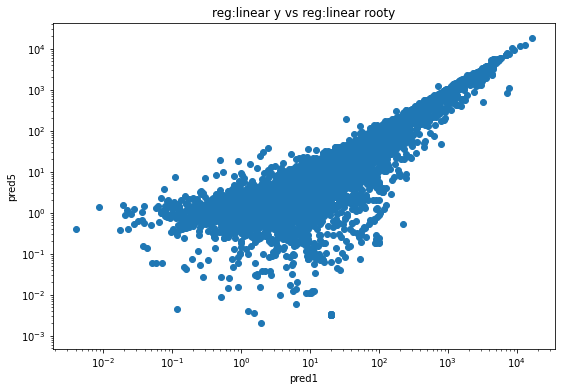

In [11]:
fig, ax = plt.subplots(figsize = (9, 6))
ax.set_xscale("log")
ax.set_yscale("log")

plt.scatter(test_pred['pred1'], test_pred['pred5'])
plt.xlabel('pred1')
plt.ylabel('pred5')
plt.title('reg:linear y vs reg:linear rooty')

In [17]:
# OOF RMSE
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

oof_pred['pred'] = oof_pred['pred7']*0.2 + oof_pred['pred8']*0.2 + oof_pred['pred9']*0.6

print('\nOOF RMSE: {:.4f}'.format(rmse(oof_pred['pred'], oof_pred['engagement_count'])))

print('OOF RMSE in 0:24069:   {:.4f}'.format(rmse(oof_pred['pred'][0:24069], oof_pred['engagement_count'][0:24069])))
print('OOF RMSE in 24069:END: {:.4f}'.format(rmse(oof_pred['pred'][24069:], oof_pred['engagement_count'][24069:])))


OOF RMSE: 795.6638
OOF RMSE in 0:24069:   161.4566
OOF RMSE in 24069:END: 2575.0135


In [13]:
test_pred['pred'] = test_pred['pred7']*0.2 + test_pred['pred8']*0.2 + test_pred['pred9']*0.6

# submission
sub[TARGET] = test_pred['pred']
sub.to_csv(output_sub, index=False)

# ...END